In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
### CONSTANTS ###
g = 9.81      #gravity... duh [m/s^2]
CD = 1.0 / 40.0   #drag coefficient
CL = 1.0  #lift coefficient
vt = 30.0 #trim velocity [m/s]
vt2 = vt**2 #square of trim velocity

In [3]:
### INITIAL CONDITIONS ###
v0 = vt #initial velocity [m/s]
theta0 = 0.0 #angle relative to horizontal [rad]
x0 = 0.0 #initial x location [m]
y0 = 1000.0 #initial y location [m]

In [4]:
T = 100.0 #length of simulation [sec]
#dt = 0.1 #time step size [sec]
#N = int(T/dt) + 1 #number of time steps

In [5]:
### Euler function, imports time step and initial vals and generates array of states ###
def eulerStep(timeStep, initial_vals):
    dt = timeStep
    N = int(T/dt) + 1
    state = np.zeros([N,4])
    state[0] = initial_vals
    
    for i in range(N-1):
        v_n = (-g*np.sin(state[i,1]) - (CD*g*(state[i,0]**2))/(CL*(vt**2)))
        theta_n = (-g*np.cos(state[i,1])/state[i,0] + g*state[i,0]/(vt**2))
        x_n = state[i,0]*np.cos(state[i,1])
        y_n = state[i,0]*np.sin(state[i,1])
        f_n = np.array([v_n, theta_n, x_n, y_n])
        state[i+1] = state[i] + dt*f_n
        
    return state

In [6]:
### PUTTING INITIAL CONDITIONS INTO STATE ARRAY ###
inits = np.zeros(4)

inits[0] = v0
inits[1] = theta0
inits[2] = x0
inits[3] = y0

pls_work = eulerStep(0.1, inits)

Text(0,0.5,'Y [m]')

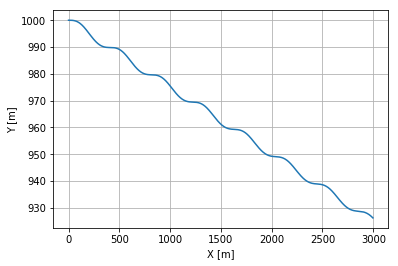

In [7]:
plt.plot(pls_work[:,2], pls_work[:,3])
plt.grid()
plt.xlabel('X [m]')
plt.ylabel('Y [m]')

In [8]:
r = 2
dt_medium = 0.1
dt_finest = dt_medium / r
dt_coarsest = dt_medium * r

state_finest = eulerStep(dt_finest, inits)
state_medium = eulerStep(dt_medium, inits)
state_coarsest = eulerStep(dt_coarsest, inits)

In [9]:
f32 = 0.0
f21 = 0.0
N_coarsest = int(T/dt_coarsest) + 1
N_medium = int(T/dt_medium) + 1


for i in range(N_coarsest):
    f32 += np.abs(state_coarsest[i,0] - state_medium[r*i,0])

for i in range(N_medium):
    f21 += np.abs(state_medium[i,0] - state_finest[r*i, 0])
    
f32 = f32*dt_coarsest
f21 = f21*dt_medium
p = np.log10(f32/f21) / np.log10(r)

In [10]:
print(p)

1.8022227485


Text(0.5,1,'Plotting Euler Step at different time steps')

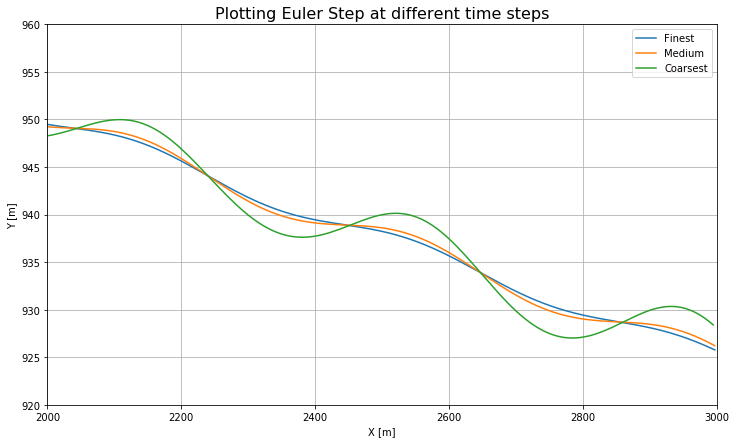

In [11]:
plt.figure(figsize=[12,7])
plt.plot(state_finest[:,2], state_finest[:,3], label='Finest')
plt.plot(state_medium[:,2], state_medium[:,3], label='Medium')
plt.plot(state_coarsest[:,2], state_coarsest[:,3], label='Coarsest')
plt.legend()
plt.grid()
plt.xlim(2000,3000)
plt.ylim(920,960)
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Plotting Euler Step at different time steps', fontsize=16)

In [18]:
5 * 5

25

In [21]:
for i in range(10):
    print(i, " "),
    for j in range(10):
        print(i*j, ),
        
        

0  
0
0
0
0
0
0
0
0
0
0
1  
0
1
2
3
4
5
6
7
8
9
2  
0
2
4
6
8
10
12
14
16
18
3  
0
3
6
9
12
15
18
21
24
27
4  
0
4
8
12
16
20
24
28
32
36
5  
0
5
10
15
20
25
30
35
40
45
6  
0
6
12
18
24
30
36
42
48
54
7  
0
7
14
21
28
35
42
49
56
63
8  
0
8
16
24
32
40
48
56
64
72
9  
0
9
18
27
36
45
54
63
72
81


In [41]:
import math
max=1
for i in range(1,50000):
    flag = True
    for j in range(2,i):
        if(i%sqrt(j) == 0):
            flag = False
            break
        
    if(flag):
        max = i
    else:
        flag = True
print(max)

NameError: name 'sqrt' is not defined